To check GPU runtime is enabled
---

In [4]:
!nvidia-smi

Wed Jul 12 18:15:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Install ultralytics module
---

In [5]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.5/627.5 kB 31.8 MB/s eta 0:00:00


Mount drive storage if required
---

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install roboflow module
---

In [6]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=d1e1927360dbbf72c9b7a25052cdcbea9bbd216f8decdd7621cf8f1bca736153
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

Download dataset prepared in roboflow workspace
---



In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="x60xKPcLsK3jrHz0sRq2")
project = rf.workspace("malla-reddy-college-of-engineering-and-technology").project("detection-carxs")
dataset = project.version(5).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.132, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to detection-5 in yolov8:: 100%|██████████| 2198/2198 [00:00<00:00, 2414.24it/s]


Train the model with custom dataset
---

In [8]:
from ultralytics import YOLO
model=YOLO('yolov8n.pt')
model.train(data='/content/detection-5/data.yaml', epochs=50, imgsz=640)

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.7MB/s]
Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/detection-5/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=tor

Initializing custom model
---

In [9]:
from ultralytics import YOLO
custom_model=YOLO('/content/runs/detect/train/weights/best.pt')


Testing with custom image
---

In [10]:
source='https://strathconacablob.blob.core.windows.net/files/filer_public_thumbnails/images/tas-medium-trafficsignals-intersection-660x396.jpg__660.0x396.0_q85_subsampling-2.jpg'
results=custom_model(source,stream=False)


100%|██████████| 65.8k/65.8k [00:00<00:00, 151kB/s] 
image 1/1 /content/tas-medium-trafficsignals-intersection-660x396.jpg__660.0x396.0_q85_subsampling-2.jpg: 384x640 6 cars, 64.5ms
Speed: 2.5ms preprocess, 64.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


Display output image
---


Found https://strathconacablob.blob.core.windows.net/files/filer_public_thumbnails/images/tas-medium-trafficsignals-intersection-660x396.jpg__660.0x396.0_q85_subsampling-2.jpg locally at tas-medium-trafficsignals-intersection-660x396.jpg__660.0x396.0_q85_subsampling-2.jpg
image 1/1 /content/tas-medium-trafficsignals-intersection-660x396.jpg__660.0x396.0_q85_subsampling-2.jpg: 384x640 6 cars, 6.5ms
Speed: 1.9ms preprocess, 6.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


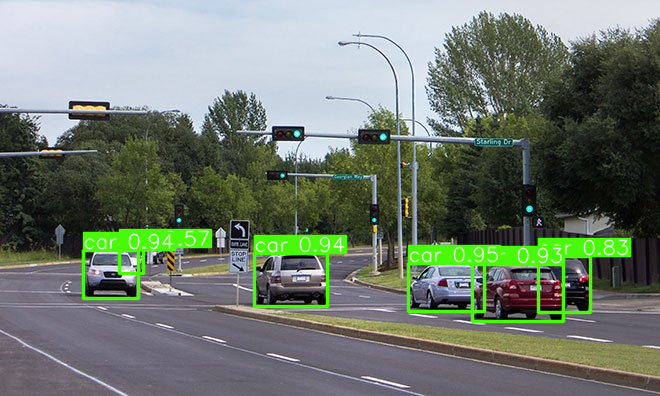

In [11]:
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
img_pth = 'https://strathconacablob.blob.core.windows.net/files/filer_public_thumbnails/images/tas-medium-trafficsignals-intersection-660x396.jpg__660.0x396.0_q85_subsampling-2.jpg'
results=custom_model(source=img_pth)
res_plotted = results[0].plot()
cv2_imshow(res_plotted)



Define names in model
---

In [12]:
CLASS_NAMES_DICT=custom_model.model.names


UTF-8 locale encoding
---

In [13]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

Install supervision
---

In [14]:
!pip install supervision==0.1.0

  Attempting uninstall: supervision
    Found existing installation: supervision 0.11.1
    Uninstalling supervision-0.11.1:
      Successfully uninstalled supervision-0.11.1


Install youtube_dl
---

In [15]:
!pip install youtube_dl==2020.12.2

Download video from youtube
---

In [41]:
from __future__ import unicode_literals
import youtube_dl
ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
  ydl.download(['https://youtu.be/R1AcYg8S4xY'])


[youtube] R1AcYg8S4xY: Downloading webpage


[download] Destination: Input video without annotations for Road Object Detection-R1AcYg8S4xY.f313.webm
[download] 100% of 18.46MiB in 06:03
[download] Destination: Input video without annotations for Road Object Detection-R1AcYg8S4xY.f140.m4a
[download] 100% of 257.21KiB in 00:04
[ffmpeg] Merging formats into "Input video without annotations for Road Object Detection-R1AcYg8S4xY.mkv"
Deleting original file Input video without annotations for Road Object Detection-R1AcYg8S4xY.f313.webm (pass -k to keep)
Deleting original file Input video without annotations for Road Object Detection-R1AcYg8S4xY.f140.m4a (pass -k to keep)


Dctections from the downloaded video using custom model
---

In [42]:
!yolo detect predict model='/content/runs/detect/train/weights/best.pt' source='/content/Input video without annotations for Road Object Detection-R1AcYg8S4xY.mkv'
# yresults=custom_model.predict(source='https://youtu.be/R1AcYg8S4xY', stream=True,save=True)

Ultralytics YOLOv8.0.132 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients

video 1/1 (1/389) /content/Input video without annotations for Road Object Detection-R1AcYg8S4xY.mkv: 384x640 8 cars, 1 number_plate, 2 persons, 61.2ms
video 1/1 (2/389) /content/Input video without annotations for Road Object Detection-R1AcYg8S4xY.mkv: 384x640 7 cars, 6.1ms
video 1/1 (3/389) /content/Input video without annotations for Road Object Detection-R1AcYg8S4xY.mkv: 384x640 11 cars, 13.2ms
video 1/1 (4/389) /content/Input video without annotations for Road Object Detection-R1AcYg8S4xY.mkv: 384x640 10 cars, 1 number_plate, 9.7ms
video 1/1 (5/389) /content/Input video without annotations for Road Object Detection-R1AcYg8S4xY.mkv: 384x640 9 cars, 1 person, 9.2ms
video 1/1 (6/389) /content/Input video without annotations for Road Object Detection-R1AcYg8S4xY.mkv: 384x640 9 cars, 1 number_plate, 10.2ms
video 1/1 (7/389) /content

Getting video info
---

In [43]:
from supervision.video.dataclasses import VideoInfo
path='/content/Input video without annotations for Road Object Detection-R1AcYg8S4xY.mkv'
# path='/content/drive/MyDrive/IntelUnnati/traffic.mp4'
video_info=VideoInfo.from_video_path(path)
print(video_info)

VideoInfo(width=3840, height=2160, fps=23, total_frames=389)


Manipulation of output as required
---

In [44]:
from supervision.video.source import get_video_frames_generator
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.draw.color import ColorPalette
from supervision.video.sink import VideoSink

from tqdm.notebook import tqdm
TARGET_VIDEO_PATH='/content/annotate.mp4'
generator=get_video_frames_generator(path)
DEFAULT_COLOR_PALETTE = [
    "#e6194b",
    "#3cb44b",
    "#ffe119",
    "#0082c8",
    "#f58231",
    "#911eb4",
    "#46f0f0",
    "#f032e6",
    "#d2f53c",
    "#fabebe",
    "#008080",
    "#e6beff",
    "#aa6e28",
    "#fffac8",
    "#800000",
    "#aaffc3",
]

box_annotator=BoxAnnotator(color=ColorPalette.from_hex(DEFAULT_COLOR_PALETTE), thickness=4, text_thickness=4, text_scale=2)


with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
  for frame in tqdm(generator, total=video_info.total_frames):
    results=custom_model(frame)[0]

    detections = Detections(
        xyxy=results.boxes.xyxy.cpu().numpy(),
        confidence=results.boxes.conf.cpu().numpy(),
        class_id=results.boxes.cls.cpu().numpy().astype(int)
    )
    labels=[
        f'{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}'
        for _, confidence, class_id, tracker_id
        in detections

    ]
    frame=box_annotator.annotate(frame=frame, detections=detections, labels=labels)
    sink.write_frame(frame)





  0%|          | 0/389 [00:00<?, ?it/s]


0: 384x640 8 cars, 1 number_plate, 2 persons, 19.3ms
Speed: 4.1ms preprocess, 19.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 7 cars, 6.5ms
Speed: 2.9ms preprocess, 6.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 9.3ms
Speed: 3.7ms preprocess, 9.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 10 cars, 1 number_plate, 16.3ms
Speed: 4.2ms preprocess, 16.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 1 person, 11.6ms
Speed: 4.2ms preprocess, 11.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 9 cars, 1 number_plate, 10.5ms
Speed: 4.6ms preprocess, 10.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 8 cars, 1 number_plate, 9.8ms
Speed: 3.5ms preprocess, 9.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 11 cars, 1 number_plate, 1 person, 10.2